##K-Nearest Neighbors



##Dohvaćanje i podjela podataka

In [ ]:
from sklearn import datasets
baza = datasets.load_iris()

In [ ]:
baza.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
baza.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
baza.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
baza.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
X=baza.data
y=baza.target

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called **overfitting**. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.50, random_state=42)

##Definiranje modela klasifikacije

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN=KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
modelKNN.classes_

array([0, 1, 2])

In [ ]:
modelKNN.effective_metric_

'euclidean'

##Analiza rezultata - metrike


###Točnost (eng. Accuracy)

In [ ]:
modelKNN.score(X_test,y_test)

0.9733333333333334

In [ ]:
y_pred_KNN=modelKNN.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_KNN)

0.9733333333333334

In [ ]:
klasa={0:'setosa',1:'versicolor',2:'virginica'}

In [ ]:
print("Za prvi cvijet iz skupa za testiranje predvidena je klasa {}, a stvarna klasa je {}.".format(klasa[y_pred_KNN[0]],klasa[y_test[0]]))

Za prvi cvijet iz skupa za testiranje predvidena je klasa versicolor, a stvarna klasa je versicolor.


###Matrica konfuzije


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_KNN)   #prvo stvarne vrijednosti pa prediktane

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]])

###Preciznost *(eng. Precision)* i odaziv (*eng. Recall*)

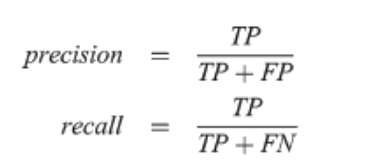

**Preciznost**: udio točno klasificiranih primjera u skupu pozitivno klasificiranih

**Odaziv**:je udio točno klasificiranih primjera u skupu svih pozitivnih primjera

Koriste se u kombinaciji!

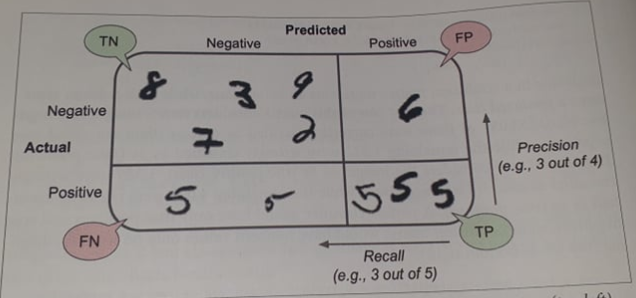





**100% Precision:** No false positives, every positive prediction is correct.

**100% Recall:** No false negatives, every negative prediction is correct.

####Precision/Recall Trade-off

Unfortunately, you can’t have both precision and recall high. **If you increase precision, it will reduce recall, and vice versa.** This is called the precision/recall tradeoff.

Example of High Precision: As we know we have multiple platform for video streaming like well known YouTube, you have restricted mode to restrict the violent and adult videos for the kids. So model focus on high precision {TP/(TP+FP)} by reducing the false positive. Means If model has classified the video is good for kids it must be safe to watch by kids. So, this can be done by reducing the false positive. Which will make higher Precision

In [ ]:
from sklearn.metrics import precision_score, recall_score, average_precision_score
precision_score(y_test,y_pred_KNN, average=None)

array([1.  , 0.92, 1.  ])

In [ ]:
recall_score(y_test,y_pred_KNN, average=None)

array([1.        , 1.        , 0.91304348])

###f1_score

mjera koja kombinira preciznost i odaziv

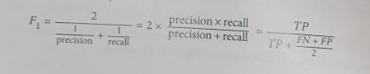

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred_KNN,average=None)

array([1.        , 0.95833333, 0.95454545])

###Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_KNN,target_names=baza.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.92      1.00      0.96        23
   virginica       1.00      0.91      0.95        23

    accuracy                           0.97        75
   macro avg       0.97      0.97      0.97        75
weighted avg       0.98      0.97      0.97        75



##Aktivnost:KNN
* isprobati KNN modele za različiti broj susjeda (npr od 1 do 20) 
* izabrat optimalni model obzirom na točnost (pronaci kad je max)
* nacrtati graf sa tocnostima

In [ ]:
#ono što vi možete je isprobati za različiti broj susjeda i onda izabrat optimalni model
tocnosti=[]
for i in range(1,21):
  modelKNN = KNeighborsClassifier(n_neighbors=i)
  modelKNN.fit(X_train,y_train)
  tocnosti.append(modelKNN.score(X_test,y_test))
tocnosti


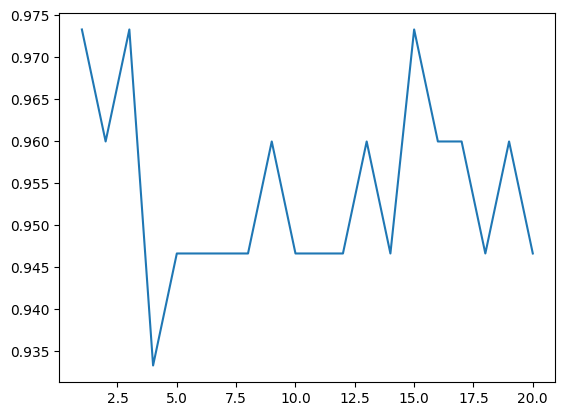

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tocnosti)

##Aktivnost: GaussianNB
* napraviti model na iris datasetu, podaci mogu ostat oni od prije
* izračunati točnost, prikazati classification report
*s kojim modelom smo postigli bolje rezultate?



In [ ]:
from sklearn.naive_bayes import GaussianNB
modelNB= GaussianNB()
modelNB.fit(X_train, y_train)
modelKNN.score(X_test,y_test)

0.9466666666666667

In [ ]:
y_pred_NB=modelNB.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_NB,target_names=baza.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.96      1.00      0.98        23
   virginica       1.00      0.96      0.98        23

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

